In [1]:
import nltk
import re

In [2]:
text = """Beans. I was trying to explain to somebody as we were flying in, that's corn.  
		That's beans. And they were very impressed at my agricultural knowledge. 
  		Please give it up for Amaury once again for that outstanding introduction. 
    	I have a bunch of good friends here today, including somebody who I served with, 
     	who is one of the finest senators in the country, and we're lucky to have him, your Senator, Dick Durbin is here. 
      	I also noticed, by the way, former Governor Edgar here, who I haven't seen in a long time, and somehow he has not aged and I have. 
       	And it's great to see you, Governor. I want to thank President Killeen and everybody at the U of I System for making it possible for me to be here today. 
        And I am deeply honored at the Paul Douglas Award that is being given to me. 
        He is somebody who set the path for so much outstanding public service here in Illinois. 
        Now, I want to start by addressing the elephant in the room. 
        I know people are still wondering why I didn't speak at the commencement.
        """

In [6]:
dataset = nltk.sent_tokenize(text)

In [7]:
for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

In [9]:
for i, sentence in enumerate(dataset):
    print(f"Sentence {i+1}: {sentence}")

Sentence 1: beans 
Sentence 2: i was trying to explain to somebody as we were flying in that s corn 
Sentence 3: that s beans 
Sentence 4: and they were very impressed at my agricultural knowledge 
Sentence 5: please give it up for amaury once again for that outstanding introduction 
Sentence 6: i have a bunch of good friends here today including somebody who i served with who is one of the finest senators in the country and we re lucky to have him your senator dick durbin is here 
Sentence 7: i also noticed by the way former governor edgar here who i haven t seen in a long time and somehow he has not aged and i have 
Sentence 8: and it s great to see you governor 
Sentence 9: i want to thank president killeen and everybody at the u of i system for making it possible for me to be here today 
Sentence 10: and i am deeply honored at the paul douglas award that is being given to me 
Sentence 11: he is somebody who set the path for so much outstanding public service here in illinois 
Sente

In [10]:
word2count = {}
for sentence in dataset:
	words = sentence.split()
	for word in words:
		if word not in word2count:
			word2count[word] = 1
		else:
			word2count[word] += 1

In [12]:
print(word2count)

{'beans': 2, 'i': 12, 'was': 1, 'trying': 1, 'to': 8, 'explain': 1, 'somebody': 3, 'as': 1, 'we': 2, 'were': 2, 'flying': 1, 'in': 5, 'that': 4, 's': 3, 'corn': 1, 'and': 7, 'they': 1, 'very': 1, 'impressed': 1, 'at': 4, 'my': 1, 'agricultural': 1, 'knowledge': 1, 'please': 1, 'give': 1, 'it': 3, 'up': 1, 'for': 5, 'amaury': 1, 'once': 1, 'again': 1, 'outstanding': 2, 'introduction': 1, 'have': 3, 'a': 2, 'bunch': 1, 'of': 3, 'good': 1, 'friends': 1, 'here': 5, 'today': 2, 'including': 1, 'who': 4, 'served': 1, 'with': 1, 'is': 4, 'one': 1, 'the': 9, 'finest': 1, 'senators': 1, 'country': 1, 're': 1, 'lucky': 1, 'him': 1, 'your': 1, 'senator': 1, 'dick': 1, 'durbin': 1, 'also': 1, 'noticed': 1, 'by': 2, 'way': 1, 'former': 1, 'governor': 2, 'edgar': 1, 'haven': 1, 't': 2, 'seen': 1, 'long': 1, 'time': 1, 'somehow': 1, 'he': 2, 'has': 1, 'not': 1, 'aged': 1, 'great': 1, 'see': 1, 'you': 1, 'want': 2, 'thank': 1, 'president': 1, 'killeen': 1, 'everybody': 1, 'u': 1, 'system': 1, 'making'

In [13]:
stopwords = nltk.corpus.stopwords.words('english')

In [14]:
filtered_words = {}
for word, count in word2count.items():
	if word not in stopwords:
		filtered_words[word] = count

In [16]:
print(filtered_words) 

{'beans': 2, 'trying': 1, 'explain': 1, 'somebody': 3, 'flying': 1, 'corn': 1, 'impressed': 1, 'agricultural': 1, 'knowledge': 1, 'please': 1, 'give': 1, 'amaury': 1, 'outstanding': 2, 'introduction': 1, 'bunch': 1, 'good': 1, 'friends': 1, 'today': 2, 'including': 1, 'served': 1, 'one': 1, 'finest': 1, 'senators': 1, 'country': 1, 'lucky': 1, 'senator': 1, 'dick': 1, 'durbin': 1, 'also': 1, 'noticed': 1, 'way': 1, 'former': 1, 'governor': 2, 'edgar': 1, 'seen': 1, 'long': 1, 'time': 1, 'somehow': 1, 'aged': 1, 'great': 1, 'see': 1, 'want': 2, 'thank': 1, 'president': 1, 'killeen': 1, 'everybody': 1, 'u': 1, 'system': 1, 'making': 1, 'possible': 1, 'deeply': 1, 'honored': 1, 'paul': 1, 'douglas': 1, 'award': 1, 'given': 1, 'set': 1, 'path': 1, 'much': 1, 'public': 1, 'service': 1, 'illinois': 1, 'start': 1, 'addressing': 1, 'elephant': 1, 'room': 1, 'know': 1, 'people': 1, 'still': 1, 'wondering': 1, 'speak': 1, 'commencement': 1}


In [19]:
import pandas as pd

word_freq_df = pd.DataFrame(list(filtered_words.items()), columns=['Word', 'Frequency'])

In [20]:

word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

In [21]:
word_freq_df

,Word,Frequency
3,somebody,3
0,beans,2
17,today,2
12,outstanding,2
41,want,2
...,...,...
67,people,1
68,still,1
69,wondering,1
70,speak,1


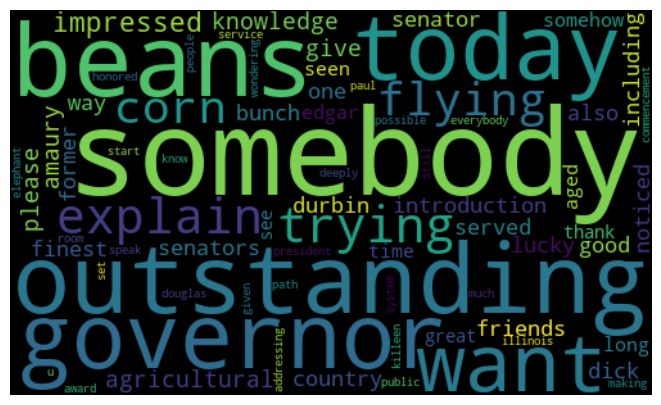

In [23]:
# Visualizing Word Frequencies with a Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=500, height=300, background_color='black').generate_from_frequencies(filtered_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()